# PARAMETERS
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid gray"> </hr>

<center><img src="https://cdn.lynda.com/course/645049/645049-636628390565991366-16x9.jpg" width="500"/></center>

It is impossible to talk about models and machine learning without mentioning parameters. A model parameter is a configuration variable that is internal to the model and whose value can be estimated from the given data. [1]

<hr style="border:2px solid gray"> </hr>

In [1]:
# Arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

The model we will use below is the one for the straight line:

###  $$y = mx + c$$

In [2]:
# x values.
x = np.linspace(0.0, 10.0, 21)
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [3]:
# y values based on x.
y = 4.0 * x - 2.0 + np.random.normal(0.0, 1.0, len(x))
y

array([-1.2352472 , -0.08974622,  2.44839187,  2.77542332,  4.50982818,
        7.86275462, 10.30269277, 11.17782123, 13.68856698, 16.15238406,
       16.24036415, 20.85351323, 22.23034381, 24.23542929, 25.30461404,
       26.6203754 , 29.93261327, 31.24382819, 32.07413023, 37.71801665,
       38.9667386 ])

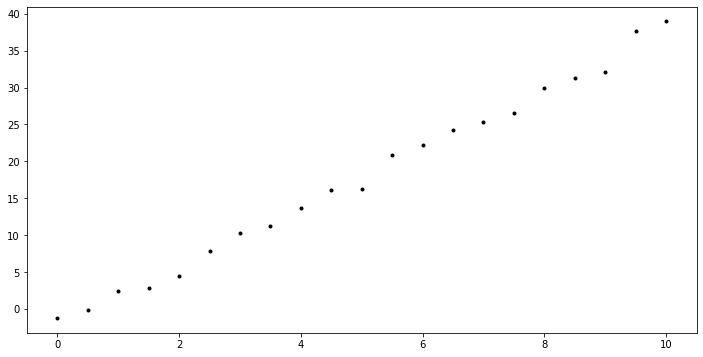

In [4]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.');


We can see that the data follows the straight line adjusted for some noise. If we were just given x and y values without knowing the relationship between them, we can try to find the parameters m and c (4 and -2 in the example above). Those are the values that relate x and y together.

We do that using least square fit - in python *numpy.polyfit* function. This function takes 3 values:
- x
- y
- degree of the fitting polynomial

x and y values are obvious and are already given. We need to decide what degree will be used.

- degree 1: $ y = ax^1 + bx^0 $
- degree 2: $ y = ax^2 + bx^1 + cx^0 $
- degree 3: $ y = ax^3+ bx^2 + cx^1 + dx^0 $

The model used in this example is the one for the straight line, therefore the degree will be 1.

In [5]:
# Use x and y to try to find the original parameters.
origParams = 4, -2
params = np.polyfit(x, y, 1)
print("Original parameters:", origParams)
print("Generated parameters:", params)

Original parameters: (4, -2)
Generated parameters: [ 4.01523239 -2.31364594]


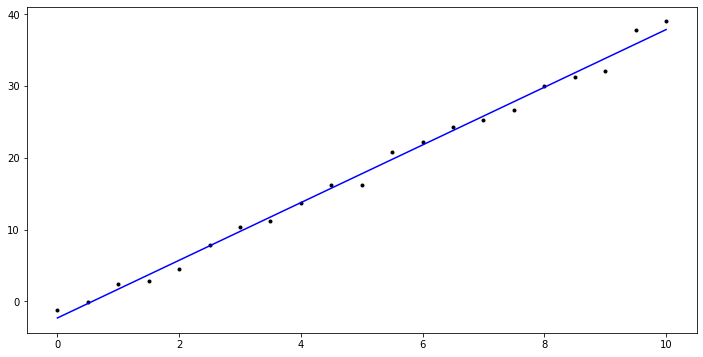

In [6]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x + params[1], 'b-');

<hr style="border-top: 1px solid #001a79;" />

<h4 style="color: #001a79;">EXERCISE 1</h4>

<h5 style="color: #001a79;">Use numpy's polyfit to fit polynomials to the following two data sets.

- Data Set 1:

    - x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
    - y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7] <br><br>

    
- Data Set 2:

    - x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
    - y = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6] </h5>

<hr style="border-top: 1px solid #001a79;" />

##### DATA 1

In [7]:
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

x = np.array(x)
y = np.array(y)

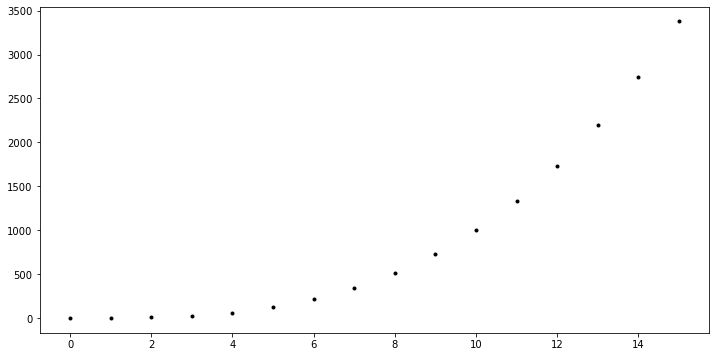

In [8]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.');

It is visible on the plot above that the y value grows faster as the x value gets higher. We will try to determine what method this is. We can discard the linear just by looking at the graph. We know the value x and will use the root of value y to see if the method is quadratic, cubic, ect.

#### $ y = x^2 $
***

In [9]:
# Getting x value with square root of y
sr = y ** (1./2.)
np.round(sr)

array([ 1.,  1.,  3.,  5.,  8., 11., 15., 18., 23., 27., 32., 37., 42.,
       47., 52., 58.])

We can discard this method and say that is isn't quadratic. We will try the cubic below.

#### $ y = x^3 $
***

In [10]:
# Checking method
cr = y ** (1./3.)
np.round(cr)

array([ 1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

We see that the value *cr* matches the value *x* set before, therefore the method is cubic and the degree we will use in numpy polifit function is 3.

In [11]:
params = np.polyfit(x, y, 3)
params

array([ 0.99699366,  0.07781416, -0.50388419,  1.22298762])

$ y = x^3 $ </br>
$ \Rightarrow y = ax^3+ bx^2 + cx^1 + dx^0 $

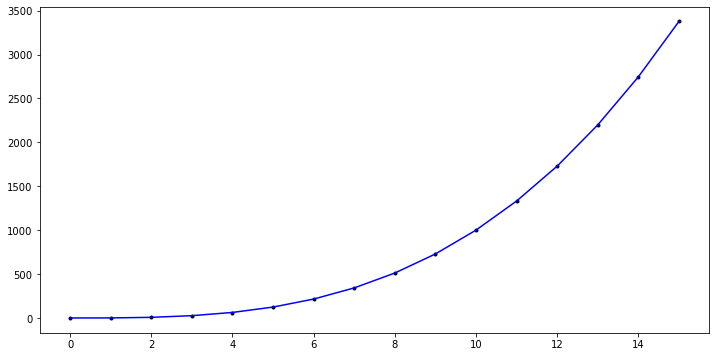

In [12]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3], 'b-');

##### DATA 2

In [13]:
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]
x = np.array(x)
y = np.array(y)

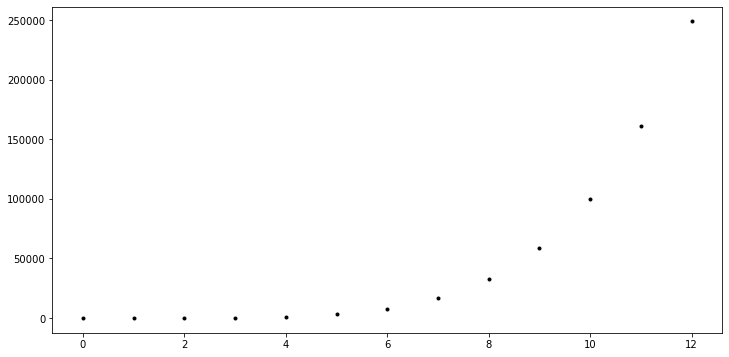

In [14]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.');

Plot above is similar to the plot generated from the Data 1 values, but the value y grows faster as the value x grows. We will try to determine relationship between those values, same as we did before.

<s> LINEAR </s> </br>
<s> QUADRATIC </s> </br>
<s>  CUBIC </s> </br>
<s>  QUARTIC </s> <br>

In [15]:
# Checking if method is quintic
qr = y ** (1./5.)
np.round(qr)

array([ 1.,  2.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

We see that value *qr* matches value *x* from data 2, and we can say that the method is quintic.

In [16]:
params = np.polyfit(x, y, 5)
params

array([ 1.00057504, -0.01414627,  0.1060666 , -0.23056784, 10.08965618,
        5.73122172])

$ y = x^5 $ </br>
$ \Rightarrow y = ax^5+ bx^4 + cx^3+ dx^2 + ex^1 + fx^0 $

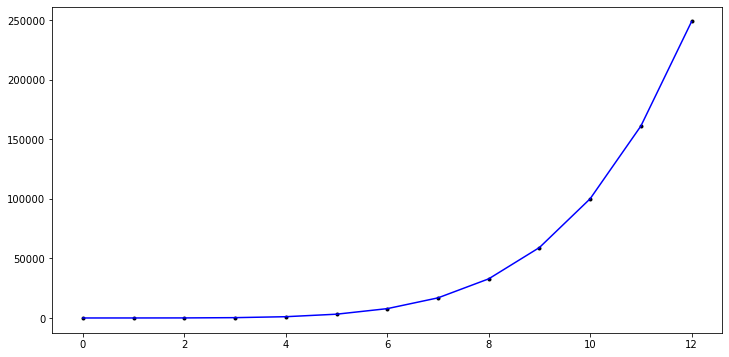

In [17]:
# Create a plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot x vs y.
ax.plot(x, y, 'k.')

# Plot x vs parameters on x.
ax.plot(x, params[0] * x**5 + params[1] * x**4 + params[2] * x**3 + params[3] * x**2 + params[4] * x + params[5], 'b-');

Both methods above have no noise introduced and the best line perfectly fits the given data. This is very unlikely in the real world. 

<hr style="border:2px solid darkblue"> </hr>

### EXPONENTIALS

So far we've investigated linear and polynomial methods. Very often function growth will be exponential.

An exponential function is a Mathematical function in the form $ y = a^x$
- *x* is a variable
- *a* is a constant which is called the base of the function and it should be greater than 0

The most commonly used exponential function base is the transcendental number *e* (~2.71828).

### $ e^x $
***

### REFERENCES

1. https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models
2. 

https://stackoverflow.com/questions/19792818/how-to-identify-exponential-growth-within-an-array-of-integer-data